In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/paxton615/GA/resource-datasets/\
/housing_data/housing-data.csv")
df = pd.read_csv("/Users/paxton615/GA/resource-datasets/\
/housing_data/housing-data.csv")
df.columns

Index(['sqft', 'bdrms', 'age', 'price'], dtype='object')

In [3]:
# df.dtypes

sqft     int64
bdrms    int64
age      int64
price    int64
dtype: object

In [4]:
# df.head()

sqft  bdrms  age   price
0  2104      3   70  399900
1  1600      3   28  329900
2  2400      3   44  369000
3  1416      2   49  232000
4  3000      4   75  539900

In [7]:
# df.describe()

sqft      bdrms        age          price
count    47.000000  47.000000  47.000000      47.000000
mean   2000.680851   3.170213  42.744681  340412.659574
std     794.702354   0.760982  22.873440  125039.899586
min     852.000000   1.000000   5.000000  169900.000000
25%    1432.000000   3.000000  24.500000  249900.000000
50%    1888.000000   3.000000  44.000000  299900.000000
75%    2269.000000   4.000000  61.500000  384450.000000
max    4478.000000   5.000000  79.000000  699900.000000

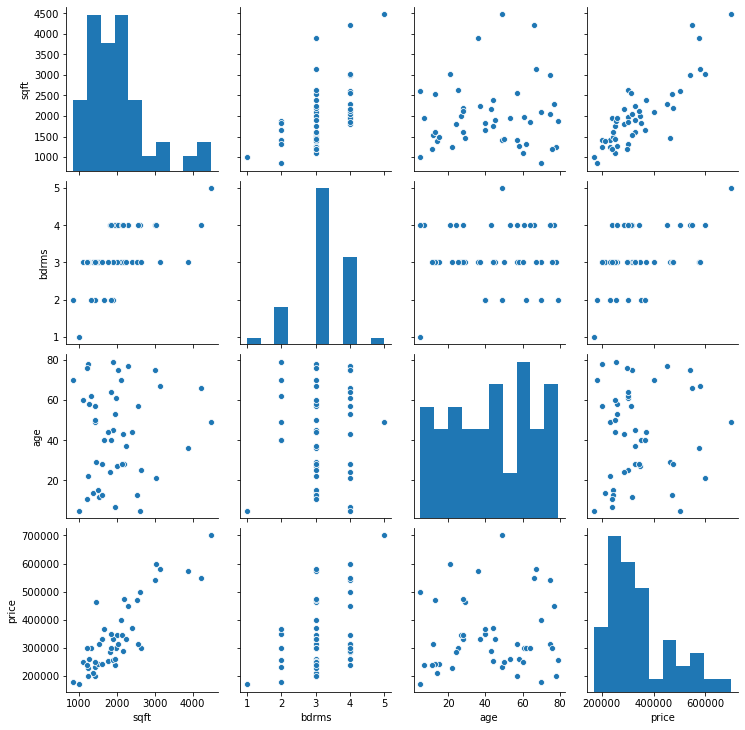

In [8]:
sns.pairplot(df)

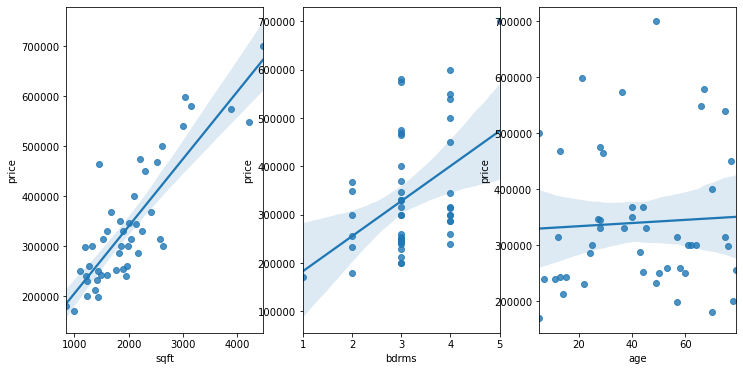

In [9]:
fig,ax=plt.subplots(1,3,figsize=(12,6))
sns.regplot(df.sqft, df.price, ax=ax[0])
sns.regplot(df.bdrms, df.price, ax=ax[1])
sns.regplot(df.age, df.price, ax=ax[2])

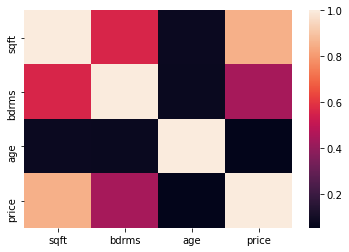

In [10]:
sns.heatmap(df.corr());

#### Multi-linear regression

In [14]:
X = df[['sqft','bdrms','age']]
X['intercept'] = 1
y = df.price
# X.head()
# y.head()

In [15]:
def solve_betas(X):
    beta_vec = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
    return beta_vec

In [20]:
co_efficient = solve_betas(X)
co_efficient

array([ 1.39334847e+02, -8.62147046e+03, -8.12178776e+01,  9.24516278e+04])

In [22]:
predictions = np.dot(X, co_efficient)

In [24]:
# predictions

In [21]:
def calculate_r2(y, yhat):
    ss_res = np.sum((y - yhat)**2)  #rss
    ss_tot = np.sum((y-np.mean(y))**2)  #tss
    r2 = 1-ss_res/ss_tot
    return r2

In [25]:
calculate_r2(y,predictions )

0.7331639990690024

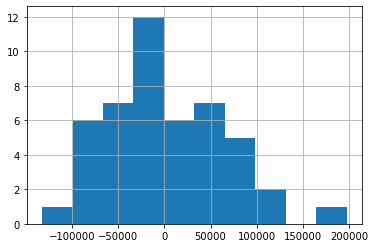

In [26]:
(y-predictions).hist();

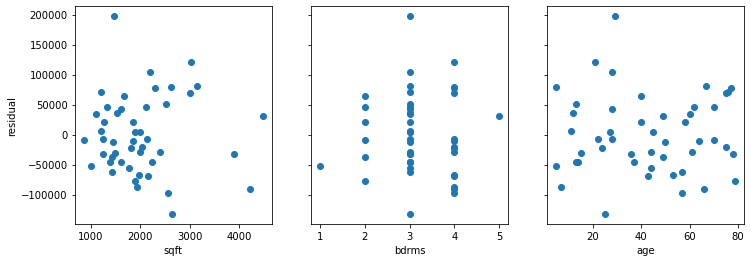

In [32]:
fig, ax = plt.subplots(ncols=3,figsize=(12,4),sharey=True)
for i, col in enumerate(X.columns[:3]):
    ax[i].scatter(X[col],(y-predictions))
    ax[i].set_xlabel(col)
ax[0].set_ylabel('residual')
plt.show()

How do you determine whether the residuals are random in regression analysis? It’s pretty simple, just check that they are randomly scattered around zero for the entire range of fitted values. When the residuals center on zero, they indicate that the model’s predictions are correct on average rather than systematically too high or low. Regression also assumes that the residuals follow a normal distribution and that the degree of scattering is the same for all fitted values.

https://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/